(fin-edu:rebalancing-intro)=
# Rebalancing

While investing should not be confused with gambling, some games, gambling and betting strategies could provide useful toy-problems and introduction to investing principles. This is the case of gambling on a coin flip game that is discussed here and used to introduce the concept of **rebalancing**.

Rebalancing:
- reduces the dispersion of the composite return
- improves risk-adjusted return
- may also improve the expected value of the composite return as well (**rebalancing premium**, or **Shannon's demon**), for processes that meet some particular conditions



```{dropdown} Contents
:open:

[Example: coin flip game](fin-edu:rebalancing-intro:coin)

[Resources](fin-edu:rebalancing-intro:references)

```

(fin-edu:rebalancing-intro:coin)=
## Example: coin flip game

In this section, the effect of rebalancing is discussed in a coin flip game. This game can be interpreted as a very simple model of a 2-asset portfolio, with 1 risky asset with only two outcomes (win or loss), and 1 safe asset (no *real* return).

```{prf:example} Shannon demon in a coin flip game
:label: shannon-demon-coin

Starting with $100 \text{€}$, and a fair coin with $50\%$ probability of for each outcome, either $\text{H: head}$ or
$\text{T: tail}$. If outcome is $\text{H}$ you gain $50\%$, if the outcome is $\text{T}$ you lose $33.3\%$.

Let's evaluate two different strategies:

1. play with all the money you have

2. at every toss, bet $50\%$ of the amount you have

What’s the expected amount at the end of the game? What's the amount distribution? ...

```

Here the problem is investigated for a set of different strategies uniquely determined by different values of the betting fraction $f$.

As discussed below, the *optimal fraction* (optimal in the sense of maximum expected geometric return; but does this definition of optimum meet your taste &mdash; e.g. your risk tolerance to negative results and dispersion of the results?) is

$$f^* = \frac{p}{l} - \frac{1-p}{g} = \dfrac{\frac{1}{2}}{\frac{1}{3}} - \frac{\frac{1}{2}}{\frac{1}{2}} = \dfrac{1}{2} = .5 \ .$$

In [1]:
#> Reset variables
%reset -f

In [2]:
# -----------------------------------------------------------------------------
# - Import libraries 
# - model single coin event: Bernoulli distribution (here choice) and gain/loss
# - number of consecutive tosses per realization, number of realizations
# -----------------------------------------------------------------------------

#> Libraries
import numpy as np
import matplotlib.pyplot as plt

#> Coin toss as a Bernoulli random variable
fracs = [ .0, .2, .4, .6, .8, 1.]
colors = plt.cm.tab10.colors
n_fracs = len(fracs)
# frac = .2

#> Bernoulli distribution
# X = 0 (loss)   p(0) = 1 - p
#     1 (win)    p(1) = p
p_win = .5      # probability of win ( 0 <= p_win <= 1 )
p_los = 1. - p_win

#> Gain and loss
# here outcome_loss is defined as negative number, while in the text is defined
# as a positive number. Nothing changes: just take the inverse of l -> -l
outcome_gain, outcome_loss = .5, -1./3.

#> N.of coin toss and realizations
n_tosses = 30
n_reals = 2000


In [3]:
# -----------------------------------------------------------------------------
# Check Kelly criterion, see below
# -----------------------------------------------------------------------------
frac_opt = p_win / np.abs(outcome_loss) - p_los / outcome_gain

print(f"Kelly criterion, optimal fraction f*")
print(f"frac_opt: {frac_opt}")

Kelly criterion, optimal fraction f*
frac_opt: 0.5


In [4]:
# -----------------------------------------------------------------------------
# Test strategies for different values of f
# -----------------------------------------------------------------------------

#> Random number generator
rng = np.random.default_rng().choice
rng_params = {'a': [outcome_gain, outcome_loss], 'p': [p_win, p_los], 'size': n_tosses}

trials = []

#> Test different strategies, with different value of frac
for frac in fracs:
    
    w_mat = []
    for real in np.arange(n_reals):
        
        outcomes = np.array( [0] + list(rng(**rng_params)) )
        w_mat += [ np.cumprod(1+frac*outcomes) ]
    
    w_mat = np.array(w_mat).T

    trial = { 'f': frac, 'w': w_mat }
    trials += [ trial ]


fraction, avg wealth, avg geo return, n.negative outcomes
f:0.0, w_avg: 1.000, r_avg: 1.000, n_neg:   0
f:0.2, w_avg: 1.644, r_avg: 1.013, n_neg: 354


f:0.4, w_avg: 2.735, r_avg: 1.021, n_neg: 591
f:0.6, w_avg: 4.224, r_avg: 1.020, n_neg: 632


f:0.8, w_avg: 6.887, r_avg: 1.015, n_neg: 873
f:1.0, w_avg: 9.766, r_avg: 1.003, n_neg: 858


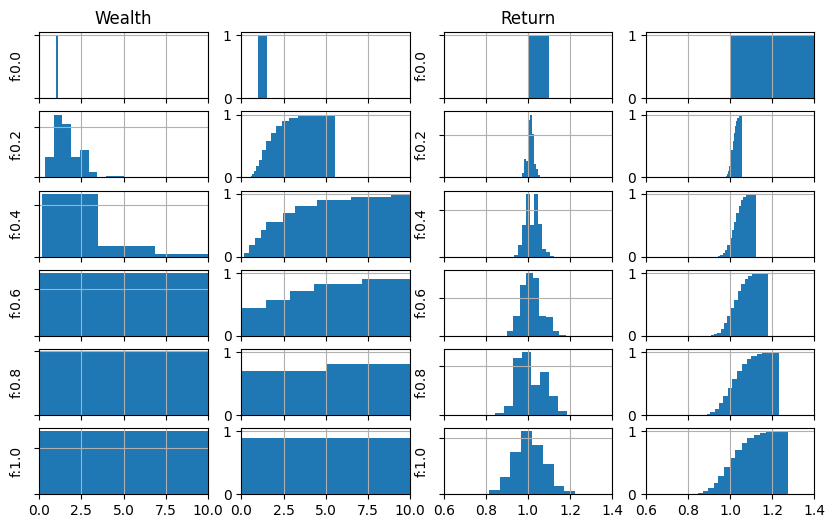

In [5]:
# -----------------------------------------------------------------------------
# Results and plots
# -----------------------------------------------------------------------------

#> Distribution of outcomes
fig, ax = plt.subplots(len(fracs),4, figsize=(10,6))

print("fraction, avg wealth, avg geo return, n.negative outcomes")
for itrial in np.arange(n_fracs):
    w_avg = np.mean(trials[itrial]['w'][-1,:])
    r_end = trials[itrial]['w'][-1,:]**(1/n_tosses)
    r_avg = np.mean(r_end)
    n_neg = np.sum(trials[itrial]['w'][-1,:] < 1.)
    
    print(f"f:{fracs[itrial]}, w_avg:{w_avg:6.3f}, r_avg:{r_avg:6.3f}, n_neg:{n_neg:4d}")
      
    ax[itrial,0].hist(trials[itrial]['w'][-1,:], density=True,)  # , histtype='step', linewidth=1.5, alpha=.7
    ax[itrial,0].set_xlim(0,10)
    ax[itrial,1].hist(trials[itrial]['w'][-1,:], bins=100, density=True, cumulative=True)
    ax[itrial,1].set_xlim(0,10)
    if ( not itrial == n_fracs-1): 
        ax[itrial,0].set_xticklabels([])
        ax[itrial,1].set_xticklabels([])
    ax[itrial,0].set_yticklabels([])

    ax[itrial,0].set_ylabel(f"f:{fracs[itrial]}")
    ax[itrial,0].grid();  ax[itrial,1].grid()
    
    ax[itrial,2].hist(r_end, density=True,)  # , histtype='step', linewidth=1.5, alpha=.7
    ax[itrial,2].set_xlim(0.6, 1.4)
    ax[itrial,3].hist(r_end, bins=100, density=True, cumulative=True)
    ax[itrial,3].set_xlim(0.6, 1.4)
    if ( not itrial == n_fracs-1): 
        ax[itrial,2].set_xticklabels([])
        ax[itrial,3].set_xticklabels([])
    ax[itrial,2].set_yticklabels([])

    ax[itrial,2].set_ylabel(f"f:{fracs[itrial]}")
    ax[itrial,2].grid();  ax[itrial,3].grid()
    if ( itrial == 0 ):
        ax[itrial,0].set_title("Wealth")
        ax[itrial,2].set_title("Return")

**todo** 

* Improve plot quality: very poor $\texttt{hist}$ outcome

* Discuss:
  * difference between algebraic and geometric return (compounding)
  * probability of negative outcomes and dispersion of the results
  * probability of intermediate negative outcomes and dispersion of results (time effect and volatility)
  * comparison with no-rebalancing strategy


In [6]:
# #> History of the 
# fig, ax = plt.subplots(1,1)
# ntrials = len(trials)
# for itrial in np.arange(ntrials):
#   trial = trials[itrial]
#   ax.semilogy(trial['w'], lw=.2, alpha=.5, color=colors[itrial])
# ax.grid()

```{prf:example} Interludio: is the coin fair?
:label: fair-coin

After tossing a coin $10$ times and getting $10$ Heads in a row, would you bet on Head or Tail?

```

Although every toss is a statistically independent event, a *very* unlikely series of outcomes under the assumption of a fair coin may induce some doubts about the truthfulness of this assumption.

See [here: Inferential statistics - Hypotesis testing (Fisher) - Is the coin fair?](https://basics2022.github.io/bbooks-programming-hs/ch/statistics/test-fisher-coin-1.html#esempio-moneta-truccata-o-no) as an example. If you want to play a bit with the notebook, just open it in Colab: the script is originally meant for $n=30$ coin flips; just 1) set $\texttt{n\_flips = 10}$; 2) run it again; 3) get the value of the extreme event proabability (either $10$ Heads or $10$ Tails) to address the question of the interludio, 

$$\texttt{x_H0_fv[0] = x_H0_fv[-1] = 0.00098} \ ,$$

i.e. the probability of getting $10$ consecutive outcomes in the first $10$ flips with a fair coin is less than $0.1\%$. A pretty low probability that the null hypotesis "the coin is fair" holds...

[Here](https://basics2022.github.io/bbooks-programming-hs/ch/statistics/test-fisher-coin-2.html) for the application of Fisher criterion for hypotesis testing for two coins with $(p_H, p_T)^{1} = (0.5, 0.5)$ and $(p_H, p_T)^{2} = (0.45, 0.55)$.


```{prf:example} Kelly criterion for the coin flip game
:label: coin-kelly-criterion

Let $p$ the probability of a win,  $q = 1-p$ the probability of a loss, $g$ is the net fraction gained in a win, $l$ is the net fraction lost in a loss. The strategy is simple: always bet the fraction $f$ of the amount you have. Is there an optimal value $f^*$ that maximizes the expected return?

```

**todo** Clean this section containing mathematical details about Kelly's criterion.

```{dropdown} Amount after $\, n \, $ coin tosses

$$x_n = \dots$$

```

```{dropdown} Geometric return

$$\ln \frac{x_n}{x_0} = \dots$$

```

```{dropdown} Optimization of the expecte value of the geometric return

$$\frac{1}{n} \frac{d}{df} \mathbb{E} \left[ \ln \frac{x_n}{x_0} \right] = \dots$$

- free or constrained optimization,...

```


Starting with the amount $x_0$, the expected amount after 1 toss reads

$$\mathbb{E}\left[ x_1 \right] = x_0(1-f) + f x_0(1+g) + f x_0 (1-l) \ ,$$

while the actual amount, 

the amount after 1 coin toss is a random variable depending on the result of the toss, represented by a $X_1 \in \{0, 1\}$ of the coin toss, $\text{0: loss}$, $\text{1: win}$, reads

$$x_1 = x_0 \left( 1 + f g \right)^{X_1} \left( 1 - f l \right)^{1- X_1}$$

After the second toss,

$$x_2 = x_1 \left( 1 + f g \right)^{X_2} \left( 1 - f l \right)^{1 - X_2}$$

and after the $n^{th}$ toss

$$x_n = x_0 \prod_{i=1}^{n} \left( 1 + fg \right)^{X_i} \left( 1 - fl \right)^{1 - X_i}$$



The maximization of the $\ln \frac{x_n}{x_0}$ (equivalent to the maximization of $\frac{x_n}{x_0}$),

$$\ln \frac{x_n}{x_0} = \sum_{i=1}^n \left\{ X_i \ln \left( 1 + fg \right) + (1 - X_i) \ln \left( 1- fl \right) \right\}$$

w.r.t. $f$ gives

$$\frac{d}{df} \ln \frac{x_n}{x_0} = \sum_{i=1}^{n} \left\{ \frac{X_i \, g}{1 + f g} - \frac{(1-X_i)l}{1 - fl} \right\}$$

The **expected value** of the logarithm of the ratio reads

$$\mathbb{E}\left[ \ln \frac{x_n}{x_0} \right] = n \left\{ p \ln ( 1 + fg ) + ( 1 - p ) \ln ( 1 - fl ) \right\} \ ,$$

and its derivative w.r.t. $f$ reads


$$\dfrac{d}{df} \mathbb{E}\left[ \ln \frac{x_n}{x_0} \right] = n \left\{ \frac{pg}{ 1 + fg } - \frac{ ( 1 - p )l}{1 - fl} \right\}$$

and becomes zero (so that $\mathbb{E}[ x_n ]= x_0$ and return is zero) when

$$\begin{aligned}
 0 & = pg(1-f^*l) - (1+f^*g)(1-p)l = \\
   & = pg - pgf^*l - l - f^*gl + pl + f^*gpl = \\
   & = pg - l - f^*gl + pl \ ,
\end{aligned}$$

and

$$f^* = \frac{pg - l + pl}{gl} = \frac{p}{l} - \frac{1-p}{g} \ ,$$


**Is this an maximum?** Compute the second-order derivative $\dfrac{d^2}{df^2} \mathbb{E}\left[ \ln \frac{x_n}{x_0} \right]$, evaluate it in $f^*$ and check if it's $< 0$. By direct computation, the second order derivative

$$\begin{aligned}
  \frac{1}{n} \dfrac{d^2}{df^2} \mathbb{E} \left[ \ln \frac{x_n}{x_0} \right]
  & = - \dfrac{pg^2}{(1 + fg)^2} - \dfrac{(1-p)l^2}{(1-fl)^2} \ ,
\end{aligned}$$

is always negative for $p \in [0,1]$, i.e. for all the possible values of the win probability of the probability distribution. Thus, the extreme point found above is a maximum.

<!--
$$\begin{aligned}
  & = \dfrac{-pg^2 + 2 pg^2fl - pg^2f^2l^2 - (1+2fg+ f^2g^2)(1-p)l^2}{(1 + fg)^2 (1-fl)^2} = \\
  & = \dfrac{-pg^2 + 2 pg^2fl - pg^2f^2l^2 - l^2 + pl^2 - 2fgl^2 + 2 fgpl^2 - f^2 g^2 l^2 + f^2 g^2 p l^2}{(1 + fg)^2 (1-fl)^2} = \\
  & = \dots
\end{aligned}$$
-->

**First order derivative for $f = 0$.** 

$$\dfrac{1}{n}\left.\dfrac{d}{df} \mathbb{E}\left[ \ln \frac{x_n}{x_0} \right]\right|_{f=0} = pg - ( 1 - p )l = p (g+l) - l$$

The condition for the first derivative in $f=0$ to be positive is equivalent to the condition of $f^* > 0$, i.e. optimal fraction is feasible, $f^* \in [0,1]$. 

**Is this maximum feasible?** If *no short* (betting against, $f \ge 0$) and *no leverage* (betting more than you have, $f \le 1$) betting is possible, the fraction $f$ must lie in range $[0,1]$: the maximization problem is not a free optimization problem, but a simple constrained optimization problem. In these problems &mdash; under the assumptions of sufficient regularity of the function &mdash; extreme points may occur where first order derivative is zero or at the boundary of the domain.

Thus:
- either the maximum is at $f^*$, if $f^* \in [0,1]$, $0 \le p(l+g) - l \le lg$
- or the maximum is at $f^* = 0$: the probability is against you, so you'd better do nothing
- or the maximum is at $f^* = 1$: the probability is with you, so you'd better bet (if your **risk tolerance** accepts the **dispersion of the results**)

If *short* is allowed, there's no constraint $f \ge 0$; if *leverage* betting is allowed, there's no constraint $f \le 1$.

**What's the optimal expected value?** Evaluate $\mathbb{E}\left[ \ln \frac{x_n}{x_0} \right]\left( f^* \right)$

$$\begin{aligned}
\frac{1}{n}\mathbb{E}\left[ \ln \frac{x_n}{x_0} \right](f^*) 
& = p \ln \left( 1 + \frac{pg}{l} - 1 + p \right) + ( 1 - p ) \ln \left( 1 - p + \frac{(1-p)l}{g} \right) = \\
& =  p \ln \left( p \left( 1 + \frac{g}{l} \right) \right) + ( 1 - p ) \ln \left[ (1-p) \left(1 + \frac{l}{g} \right)  \right] = \\
& = \ln \left\{ \left[ p \left( 1 + \frac{g}{l} \right) \right]^p \left[ q \left(1 + \frac{l}{g} \right) \right]^{q} \right\}
\end{aligned}$$


(fin-edu:rebalancing-intro:references)=
## Resources
- [The Bull](fin-edu:resources:the-bull) podcast. Puntate:
  - **217.** Il modo migliore per Ribilanciare il portafoglio
  - **152.** La magia del ribilanciamento e il demone di Shannon
  - **117.** Come ribilanciare il portafoglio (e previsioni per i prossimi 10 anni)
- [R.Arnott](fin-edu:resources:people:arnott), over-rebalancing
- [Market sentiment, Shannon's demon](https://www.marketsentiment.co/p/shannons-demon)
